In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_data=pd.read_csv("Salary_Data.csv")

In [3]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary_data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
salary_data.isnull().sum()


YearsExperience    0
Salary             0
dtype: int64

In [8]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


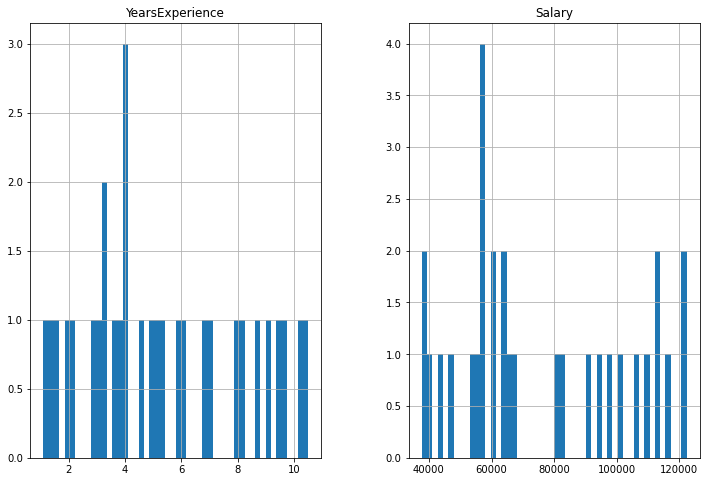

In [11]:
salary_data.hist(bins=50,figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

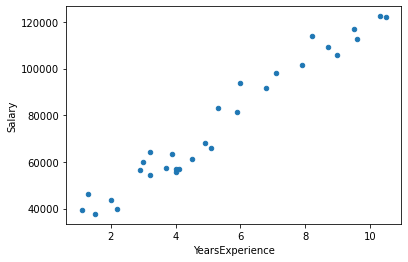

In [13]:
salary_data.plot(kind="scatter",x="YearsExperience",y="Salary",alpha=1)

In [14]:
corr_matrix=salary_data.corr()

In [15]:
corr_matrix["YearsExperience"].sort_values(ascending=False)

YearsExperience    1.000000
Salary             0.978242
Name: YearsExperience, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

X = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
col = ['X_train', 'X_test', 'y_train', 'y_test']
salary_data = [X_train, X_test, y_train, y_test]
for i in range(len(col)):
    print(f'Shape of {col[i]}: {salary_data[i].shape}')

Shape of X_train: (22, 1)
Shape of X_test: (8, 1)
Shape of y_train: (22,)
Shape of y_test: (8,)


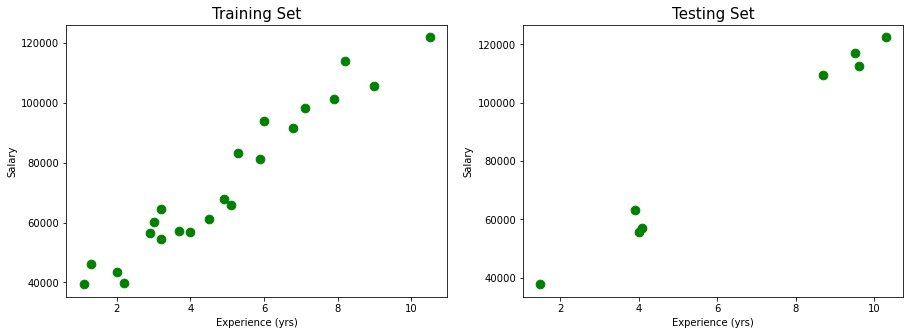

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(X_train, y_train, s=75, color='green')
ax[0].set_xlabel('Experience (yrs)')
ax[0].set_ylabel('Salary')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(X_test, y_test, s=75, color='green')
ax[1].set_xlabel('Experience (yrs)')
ax[1].set_ylabel('Salary')
plt.show()

In [25]:
from sklearn.linear_model import  LinearRegression


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [27]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(f'Coefficients: {regr.coef_}')
print(f'Intercepts: {regr.intercept_}')

Coefficients: [9379.71049195]
Intercepts: 26986.691316737248


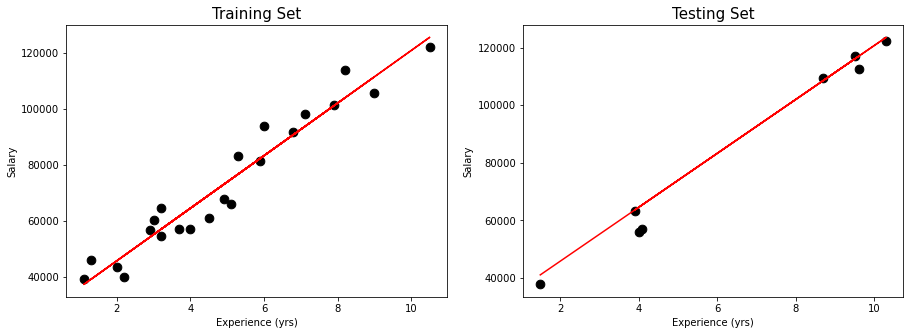

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(X_train, y_train, s=75, color='black')
ax[0].plot(X_train, regr.coef_*X_train + regr.intercept_, '-r')
ax[0].set_xlabel('Experience (yrs)')
ax[0].set_ylabel('Salary')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(X_test, y_test, s=75, color='black')
ax[1].plot(X_test, regr.coef_*X_test + regr.intercept_, '-r')
ax[1].set_xlabel('Experience (yrs)')
ax[1].set_ylabel('Salary')
plt.show()

In [29]:
y_pred = np.round(regr.predict(X_test))
pd.DataFrame({'Years Experience': X_test[:,0], 'Actual Salary': y_test, 'Predicted Salary': y_pred})

,Years Experience,Actual Salary,Predicted Salary
0,1.5,37731.0,41056.0
1,10.3,122391.0,123598.0
2,4.1,57081.0,65444.0
3,3.9,63218.0,63568.0
4,9.5,116969.0,116094.0
5,8.7,109431.0,108590.0
6,9.6,112635.0,117032.0
7,4.0,55794.0,64506.0


In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

In [31]:
print(f'Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 3508.75
Residual Sum of Squares(MSE): 22410025.25
R2-Score: 0.977918779028194
